# Introduction

This group project aims to predict the usage of a video game research server by analyzing which types of players are most likely to generate large amounts of data. Specifically, the goal is to answer the proposed question: **Can experience level can predict the total number of hours a player is likely to complete in a month?** This research will be conducted within the context of a Minecraft server developed by the Pacific Laboratory for Artificial Intelligence (PLAI), a research group within the Department of Computer Science at the University of British Columbia. The team's research focuses on developing a model of embodied AI that can realistically interact with real-time players. To support this, the team has set up a Minecraft server with the goal of collecting 10,000 hours of multiplayer gameplay. The data will be used to train AGI-like agents capable of responding appropriately in video and audio perceptual environments. To ensure the success of this project, the team needs to target their recruitment efforts effectively, which is where the analysis of this project will come forth.

In [29]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 9)
library(RColorBrewer)

In [30]:
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

players_data <- read_csv(url_players)
players_data

sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12


This project involves two datasets: one containing personal information for all players in the game and another containing data about the individual play sessions for these players. To address the research question, the personal data from the first dataset will be used. As shown in the player's table above, the players dataset includes 196 observations across 9 variables.



In [31]:
player_col_names <- colnames(players_data)
player_variables <- tibble(Variable_Name = player_col_names)
player_variables_types <- c("character", "logical", "character", "double", "character", "character", "double", "logical", "logical") 
player_variables_interp <- c("Gaming level of experience",
                             "Player's subscription status (TRUE = Subscribed, FALSE = Not Subscribed)",
                             "Hashed version of individual's email address",
                             "The number of hours the player has played",
                             "The name of the player",
                             "The gender of the player",
                             "The age of the player",
                             "A unique identifier for each player",
                             "Name of player's gaming organization")
player_variables_example <- c("Pro, Veteran, Amateur, Regular, Beginner",
                              "TRUE, FALSE",
                              "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d",
                              "30.3, 0, 1.6",
                              "Morgan, Christian, Blake, Flora",
                              "Male, Female, Non-binary, Prefer not to say, Two Spirited",
                              "9, 17, 21, 25",
                              "17, 21, 22, etc.",
                              "empty")

player_variables <- player_variables |>
                        mutate(Player_Data_Type = player_variables_types) |>
                        mutate(Variable_Interpretation = player_variables_interp) |>
                        mutate(Variable_Examples = player_variables_example)
player_variables


           

Variable_Name,Player_Data_Type,Variable_Interpretation,Variable_Examples
<chr>,<chr>,<chr>,<chr>
experience,character,Gaming level of experience,"Pro, Veteran, Amateur, Regular, Beginner"
subscribe,logical,"Player's subscription status (TRUE = Subscribed, FALSE = Not Subscribed)","TRUE, FALSE"
hashedEmail,character,Hashed version of individual's email address,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d
played_hours,double,The number of hours the player has played,"30.3, 0, 1.6"
name,character,The name of the player,"Morgan, Christian, Blake, Flora"
gender,character,The gender of the player,"Male, Female, Non-binary, Prefer not to say, Two Spirited"
age,double,The age of the player,"9, 17, 21, 25"
individualId,logical,A unique identifier for each player,"17, 21, 22, etc."
organizationName,logical,Name of player's gaming organization,empty


# Methods & Results

First we will load the players dataset and wrangle the data file by selecting the `experience` and `played_hours` columns. Then, we will change the `experience` data type into a categorical variable.

In [32]:
library(tidyverse)

url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url) |>
    select(experience, played_hours) |>
    mutate(experience = as.factor(experience))

head(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,played_hours
<fct>,<dbl>
Pro,30.3
Veteran,3.8
Veteran,0.0
Amateur,0.7
Regular,0.1
Amateur,0.0


We create a new data set to compute the average total hours played across every experience levels using `group_by` and `summarize`, then visualize the relationship between the experience level and the average total hours played using a barplot to explore the two variables' relationship.

experience,played_hours
<fct>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


No summary function supplied, defaulting to `mean_se()`


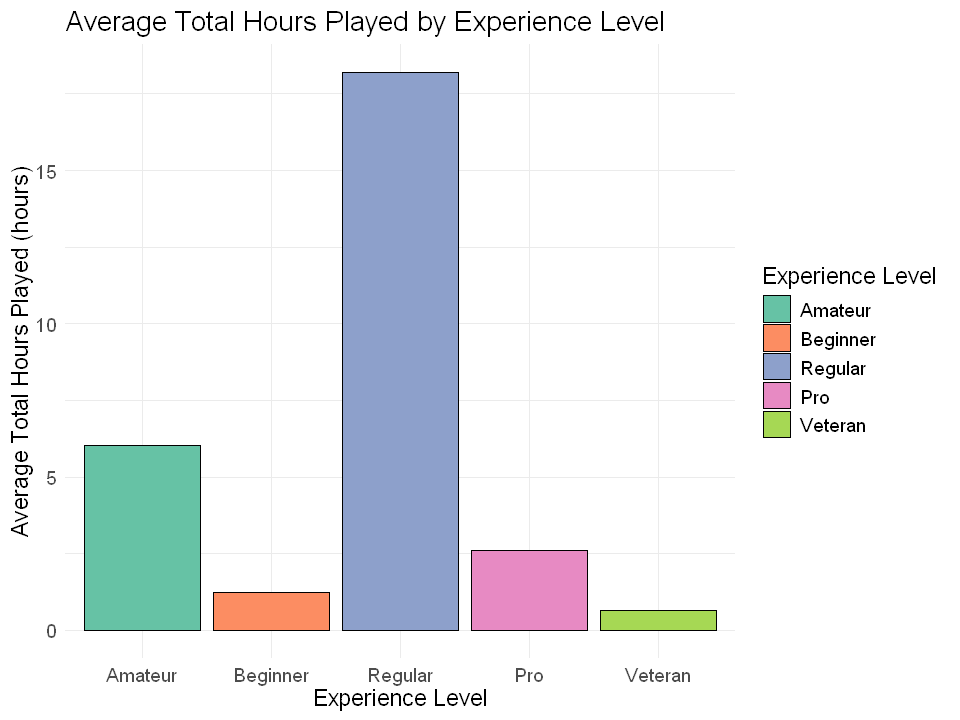

In [33]:
options(repr.plot.width = 8, repr.plot.height = 6)

players_mean <- players |>
    group_by(experience) |>
    summarize(played_hours = mean(played_hours)) |>
    mutate(experience = factor(experience, levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran")))

players_mean
              
players_explore_plot <- ggplot(players_mean, aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "summary", color = "black") +
    labs(title = "Average Total Hours Played by Experience Level",
         x = "Experience Level",
         y = "Average Total Hours Played (hours)",
        fill = "Experience Level") +
    theme_minimal() +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 14))
players_explore_plot

We decided to use K-nearest neighbor regression, because the value that the proposal question is trying to predict is a numerical value. Comparing between knn regression and linear regression, because the knn regression works well with non-linear relationship, it would be more ideal to use knn regression because the visualizations suggest that these variables might not have a linear relationship. 

Because we're using K-nn regression, every variable must be a numerical value for the model to predict, which means we have to change any categorial data type into numerical by encoding them to perform K-nn regression. In this case, the `experience` column is the categorical variable that needs to be encoded. We'll add a new column encoding the experience variable, in which 1 means an Amateur, 2 means a Beginner, 3 means a Regular, 4 means a Pro, and 5 means a Veteran. This column will be called `encoded_experience`

In [34]:
players_encoded <- players |>
    mutate(encoded_experience = case_when(
        experience == "Amateur" ~ 1,
        experience == "Beginner" ~ 2,
        experience == "Regular" ~ 3,
        experience == "Pro" ~ 4,
        experience == "Veteran" ~ 5)) 

head(players_encoded)

experience,played_hours,encoded_experience
<fct>,<dbl>,<dbl>
Pro,30.3,4
Veteran,3.8,5
Veteran,0.0,5
Amateur,0.7,1
Regular,0.1,3
Amateur,0.0,1


Next, we split the data into two sets, a training and testing dataset of 75% and 25% respectively. We set the seed to 1 to make the random splits reproducible.

In [35]:
library(tidymodels)
library(gridExtra)

set.seed(1)

players_split <- initial_split(players_encoded, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

We perform a 5-fold cross-validation to choose the optimal *K* value for our model by running a cross-validation for a grid of neighbours ranging from 1 to 50, then pick out the *K* that produces the smallest RMSPE value.

In [36]:
players_recipe <- recipe(played_hours ~ encoded_experience, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_wkflw <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

gridvals <- tibble(neighbors = seq(1:50))

players_result <- players_wkflw |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_min <- players_result |>
    filter(mean == min(mean)) |>
    pull(neighbors)

players_min

[1] 40

The smallest RMSPE occurs when *K* = players_min. We use this *K* value to make predictions on the test data to answer the proposal question.

In [37]:
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = players_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training) 

players_summary <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.946699


We do some more data wrangling in order to create the plot to evaluate our model further. As we are only trying to find which type of players would contribute to the most amount of data (highest `played_hours`) and not trying to compare the prediction with any individual value, we decided to compare the prediction to the mean playing time for each experience level in the testing dataset. 

The bars in our plot indicate the true mean value, and the points in our plot indicate the predicted value. We decided to scale the y-axis to see the difference in our predictions more clearly.

experience,played_hours,.pred
<fct>,<dbl>,<dbl>
Amateur,2.34117647,5.5675
Beginner,0.43750000,1.0200
Pro,0.03333333,16.8950
Regular,1.34166667,16.8925
Veteran,0.06000000,1.5325


No summary function supplied, defaulting to `mean_se()`


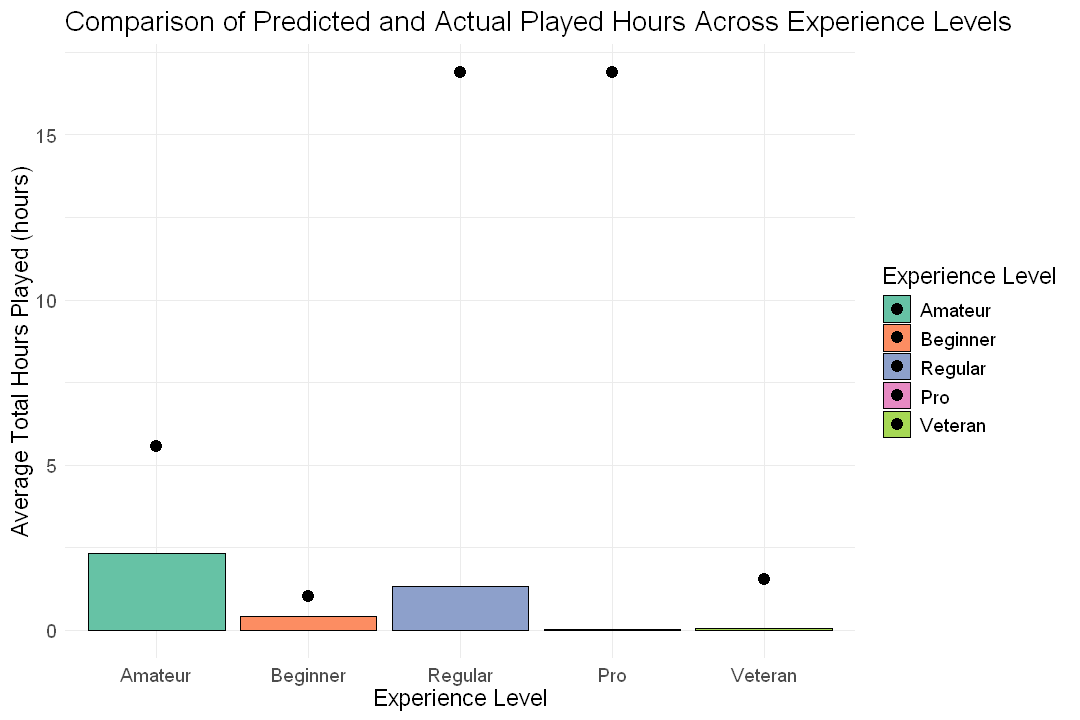

In [38]:
players_values <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    group_by(experience) |>
    summarize(played_hours = mean(played_hours),
             .pred = mean(.pred)) |>
    mutate(experience = factor(experience, levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran")))

players_values

options(repr.plot.width = 9, repr.plot.height = 6)

players_prediction_plot <- ggplot(players_values, aes(x = experience, y = played_hours, fill = experience)) +
    geom_bar(stat = "summary", color = "black") +
    geom_point(aes(y = .pred), size = 3) +

    labs(title = "Comparison of Predicted and Actual Played Hours Across Experience Levels",
         x = "Experience Level", 
         y = "Average Total Hours Played (hours)",
        fill = "Experience Level") +
    theme_minimal() +
    scale_fill_brewer(palette = "Set2") +
    theme(text = element_text(size = 14))
    
players_prediction_plot

# Discussion

As depicted by the bar graphs representing the actual total average number of hours played by each experience level, it was found that those under the "Amateur" experience level played the most hours on average, with the "Regular" experience level following in second in the testing dataset. The experience level with the lowest average total number of hours was found to be the "Pro" level in the testing dataset. 

Then, upon performing Knn regression, the model determined that "Pro" players had the highest average total hours played, with "Regular" coming in at second place. The experience level with the lowest predicted value was the "Beginner". This is in contrast to the observed trend in the testing dataset, where "Pro" logged the least hours. 

The RMSPE for this model is around 9.9 hours, which is not a lot in context of the goal of collection 10,000 hours of Minecraft gameplay. However, putting it in context of one player, 9.9 hours could be a significant difference.

The overall results were partially expected but also contained some surprises. The small dataset accounts for the fact that the model cannot split the training and testing data reasonably. This explains why the testing dataset's average total playtime hours or the prediction from the KNN regression model doesn't reflect the entire dataset accordingly. 

This shift in the prediction could also be due to the tendency of the KNN model to weigh the influence of neighboring data points heavily. The "Pro" players might have consistent playtime patterns that are captured well by the model while "Amateurs" could be more variable in their engagement with the game, possibly leading to fewer total hours on average despite their potential for longer individual play sessions. The difference between actual and predicted hours for the "Amateur" experience level suggests that there are complex patterns in player behavior that are not fully captured by the model, or that there might be factors like inconsistent playing habits or interruptions in play that impact their total hours.

The actual data analysis for the whole dataset showed that "Regular" logged the highest average total hours played. This suggests that recruiting "Regular" may lead to a strong inflow of data, as they are likely to spend considerable time exploring and engaging with the game. However, the KNN regression model, which predicted that "Pro" players would contribute the highest total hours, points to the possibility that these advanced players engage in more consistent and potentially data-rich activities. 

Based on what we found with our model, the answer to our proposal question is: **Experience level cannot predict the total number of hours played given this dataset**. The differences between actual and predicted hours means the targets for recruitment remain unclear. This raise several further questions of whether or not we could have done something different for the model to be more precise, for example adding predictors or setting other seeds to find more "suitable random splits". However, something fundamental that should be tackled other than prediction methods is the collection of new data. Most of the predictive model's issues were due to the fact that the given dataset was too small, which accounts for the model's imprecision. We believe applying similar proposed methods in this project onto a bigger dataset would churn out more ideal results. 